# The Effect of Social Media Use on Mental Health

<p>Our project studied a dataset consisting of attributes such as an individual’s age, education level, social media use, anxiety levels, etc. We wanted to determine to what extent does a person’s social media use impact their anxiety and well being levels.</p>
<p>Our hypothesis is that if a person uses social media more, their well-being score will go down and their anxiety score will go up.</p>



In [1]:
!pip3 install plotly
!pip3 install statsmodels

In [2]:
import pandas

dataset = pandas.read_csv('MediaVSMentalHealth.csv')

dataset

,Age,Age Category,Sex:,Qualifications,Habitat,Media use(hrs/day),Media category,Well-being score,Well-being category,anxiety score,anxiety category
0,30,Young,Female,PG,Urban Municipal Area,10,High,56,Middle,9,Low
1,27,Young,Male,PG,Urban Municipal Area,8,Middle,48,Middle,17,Low
2,25,Young,Male,PG,Urban Municipal Area,11,High,45,Low,18,Low
3,25,Young,Male,PG,Urban Municipal Area,12,High,50,Middle,12,Low
4,22,Young,Male,UG,Urban Municipal Area,8,Middle,41,Low,10,Low
...,...,...,...,...,...,...,...,...,...,...,...
421,24,Young,Male,PG,Rural,10,High,49,Middle,3,Low
422,36,Young,Female,PG,Urban Municipal Area,11,High,55,Middle,6,Low
423,36,Young,Male,PG,Rural,6,Low,55,Middle,2,Low
424,33,Young,Female,PG,Metropolitan City,9,Middle,47,Middle,7,Low


## Difference in Effects of Social Media on Stress Averages For Different Sexes

<p>We separated the male and female data from the large dataset into two separate datasets. Then using those charts we separately plotted the female and male datasets using plotly. We used Media use in hours per day for the x-axis and anxiety score for the y-axis and on two other plots we used a well-being score on the y-axis instead. We then found the line of best fit for the two plots. We then made two correlation heat maps using seaborn.</p>
<p>We separately plotted the female and male data to see if a person’s sex had an impact on how social media affected anxiety and well-being scores. We then found the line of best fit for these two plots to determine if there was any difference between the two sexes. This would show if sex had an impact on our hypothesis that media can negatively affect your mental health. We made the correlation charts to see if there were any more differences.</p>
<p>Our plot maps and lines of best fit showed that there is a positive correlation between media use and a person’s anxiety score, and that a person’s sex does affect the relation between media use and a persons anxiety. We found that the female line of best fit (1.16153*mediause+3.51227) had a steeper slope than male line of best fit (0.840821*mediause+4.34207).</p>



In [3]:
female_dataset = dataset[dataset['Sex: '] == 'Female']
male_dataset = dataset[dataset['Sex: '] == 'Male  ']

In [4]:
dataset['Sex: '].unique()

array(['Female', 'Male  '], dtype=object)

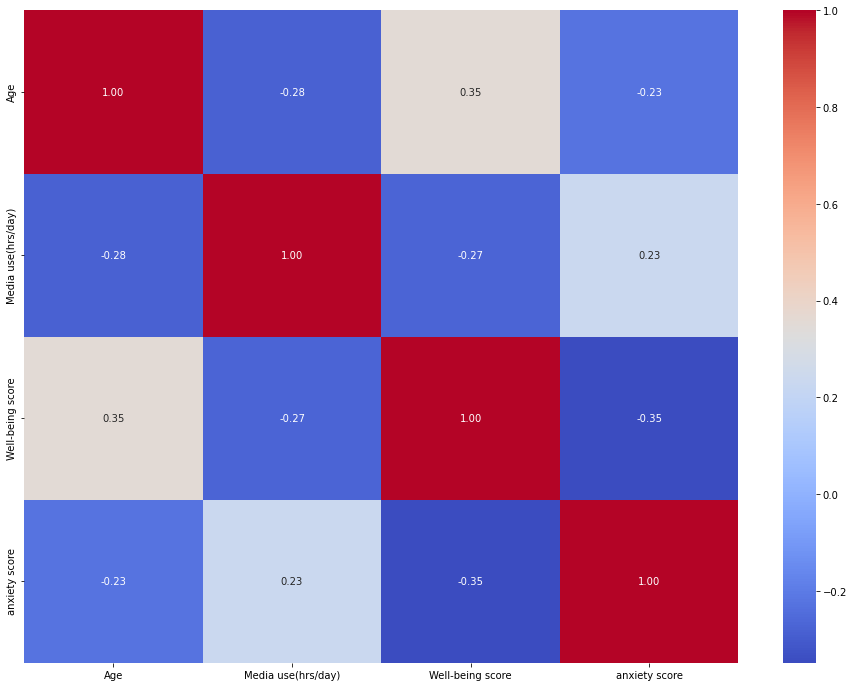

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,12))
sns.heatmap(data=female_dataset.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

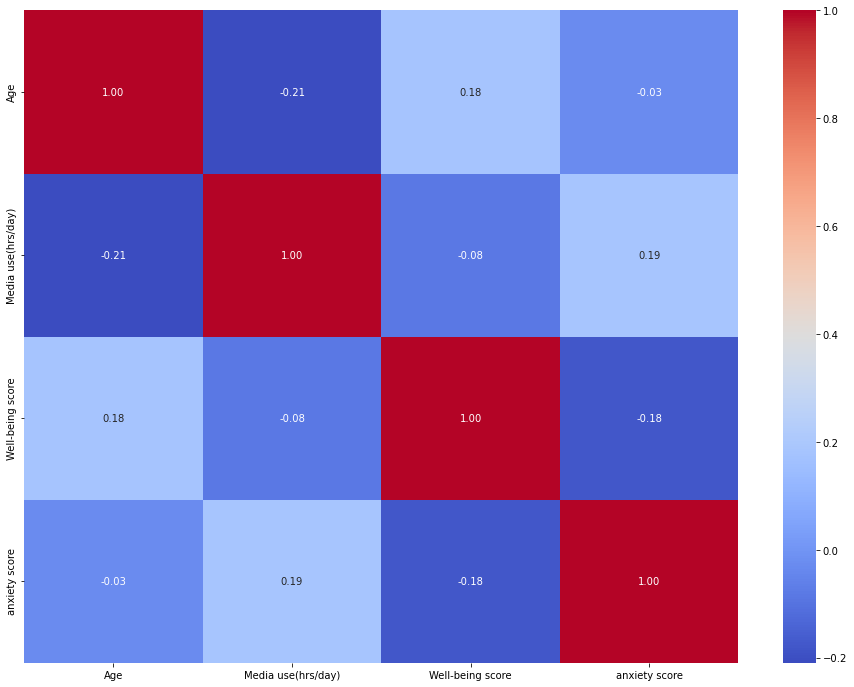

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data=male_dataset.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [7]:
import matplotlib.pyplot as plt
import plotly.express

scatter_data = female_dataset[[female_dataset.columns[5], female_dataset.columns[9]]]

graph_title = f'{female_dataset.columns[5]} versus {female_dataset.columns[9]} for females'

plotly.express.scatter(scatter_data, female_dataset.columns[5], female_dataset.columns[9], trendline = 'ols', title = graph_title)

In [8]:
scatter_data = male_dataset[[male_dataset.columns[5], male_dataset.columns[9]]]

graph_title = f'{male_dataset.columns[5]} versus {male_dataset.columns[9]} for males'

plotly.express.scatter(scatter_data, male_dataset.columns[5], male_dataset.columns[9], trendline = 'ols', title = graph_title)

In [9]:
scatter_data = female_dataset[[female_dataset.columns[5], female_dataset.columns[7]]]

graph_title = f'{female_dataset.columns[5]} versus {female_dataset.columns[7]} for females'

plotly.express.scatter(scatter_data, female_dataset.columns[5], female_dataset.columns[7], trendline = 'ols', title = graph_title)

In [10]:
scatter_data = male_dataset[[male_dataset.columns[5], male_dataset.columns[7]]]

graph_title = f'{male_dataset.columns[5]} versus {male_dataset.columns[7]} for males'

plotly.express.scatter(scatter_data, male_dataset.columns[5], male_dataset.columns[7], trendline = 'ols', title = graph_title)

## Bar Graph of Different Habitats and Media Usage

<p>We used the pandas module to construct a bar chart, illustrating the average media usage among different locations. We used plotly to express the bar chart, where habitat was the independent variable and media usage was the dependent variable. We then colored the graph by a scale of increasing media usage to better visualize the different media usages across different habitats.</p>
<p>We wanted to analyze the media usage across different habitats to find out if the habitats people were in had a major factor on the media usage. We thought it would be interesting to compare the average media usage across different types of communities because it would make sense that people would use technology more often in a setting that doesn’t have a lot of activities or places to go to.</p>
<p>Based on the bar graph, the highest average of media usage was in rural locations, the next-highest average was in Urban Municipal Areas, and the  lowest average was in Metropolitan cities. Although these numbers don’t prove to be very drastic from one another, they do differentiate across locations. Rural areas are usually communities with less buildings, so it would make sense that people tend to rely on social media and technology both for communication and entertainment, where areas like Urban Municipal Areas and especially Metropolitan areas are more condensed for population as well as have more activities and buildings outside of technology.</p>



In [11]:
bar_chart_data = dataset[[dataset.columns[4], dataset.columns[5]]]

bar_chart_data = bar_chart_data.groupby('Habitat').mean()

bar_chart_data['Habitat'] = bar_chart_data.index

plotly.express.bar(bar_chart_data, x = dataset.columns[4], y = dataset.columns[5], color = dataset.columns[5])

## Scatterplot Between Media Usage and Anxiety

<p>We used plotly to create a scatter plot between media usage(x) and anxiety(y).</p>
<p>We compared the two to see if there was a relationship between social media usage and anxiety.</p>
<p>The relationship between media usage(x) and anxiety(y) was represented by a line with equation y = 0.93x + 4.38.</p>



In [12]:
dataset.corr()

,Age,Media use(hrs/day),Well-being score,anxiety score
Age,1.000000,-0.233986,0.260147,-0.115251
Media use(hrs/day),-0.233986,1.000000,-0.165749,0.198499
Well-being score,0.260147,-0.165749,1.000000,-0.263366
anxiety score,-0.115251,0.198499,-0.263366,1.000000


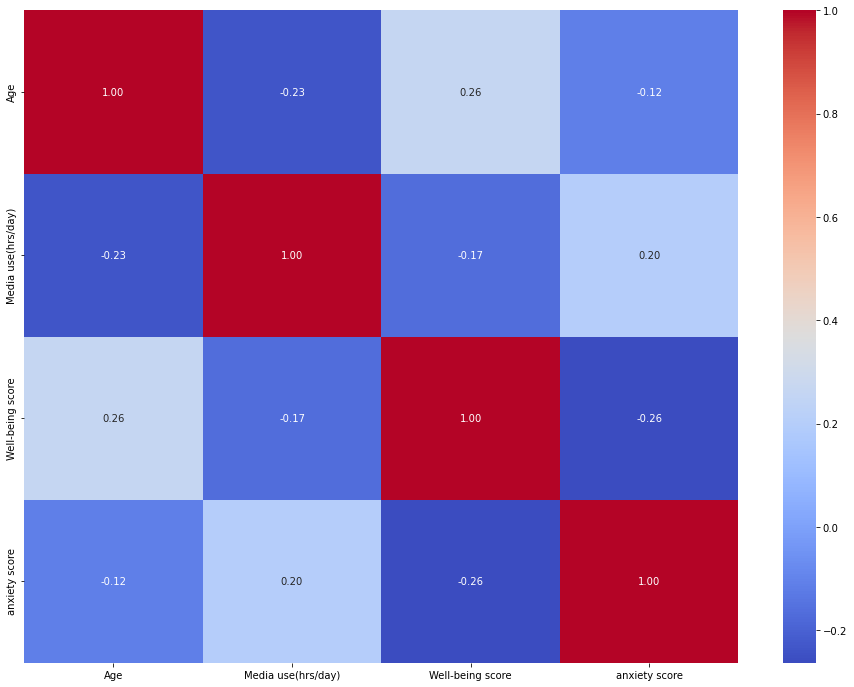

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(data=dataset.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [14]:
scatter_data = dataset[[dataset.columns[5], dataset.columns[9]]]

graph_title = f'{dataset.columns[5]} versus {dataset.columns[9]}'

plotly.express.scatter(scatter_data, dataset.columns[5], dataset.columns[9], trendline = 'ols', title = graph_title)

## Scatterplot Comparing Age to Media Usage

<p>Based on data we had collected and stored in a pandas module, we created a plotly scatter plot to compare the age of an individual to their daily media usage.</p>
<p>During our research stage, a few hypotheses arose that we could test with our data. We wanted to know if media usage went down as age went up, which would be evident in our scatterplot if there was a negative correlation. A Negative correlation occurs when the correlation coefficient is below zero, evident in a downward sloping line.</p>
<p>The scatter plot showed a weak, but still present negative correlation. The data confirmed that as age goes up, media usage per day usually decreases.</p>



In [15]:
scatter_data = dataset[[dataset.columns[0], dataset.columns[5]]]

graph_title = f'{dataset.columns[0]} versus {dataset.columns[5]}'

plotly.express.scatter(scatter_data, dataset.columns[0], dataset.columns[5], trendline = 'ols', title = graph_title)

## Relationship Between Social Media Use and Well Being Score

<p>To find the relationship between Social Media use and a person’s well being score we used plotly to create a scatter plot that compared the two. As well as going more in depth and creating two more scatter plots for male and female data.</p>
<p>We wanted to to see how the amount of time spent on social media affects a person’s well being score.</p>
<p>The created scatter plot showed a weak negative correlation between social media use and well being score. The data shows that as the amount of hours spent on social media per day increased, well being score decreased. Also that females well being score was more negatively effected by more time spent on social media then males.</p>



In [16]:
scatter_data = dataset[[dataset.columns[5], dataset.columns[7]]]

graph_title = f'{dataset.columns[5]} versus {dataset.columns[7]}'

plotly.express.scatter(scatter_data, dataset.columns[5], dataset.columns[7], trendline = 'ols', title = graph_title)

## Well-Being Score Compared to Anxiety Score
<p>To compare the Well-Being Scores to the corresponding Anxiety Scores, we used the plotly module to generate a scatter plot graph to plot Well-Being Scores against Anxiety Scores. We also generated a line of best fit to show the average effect anxiety has on well-being.</p>
<p>While it does not directly pertain to our hypothesis, we thought it would be interesting and useful to see how big of a factor anxiety was in overall well-being.</p>
<p>Our data shows that anxiety and overall well-being have a loose inverse correlation. This means that while anxiety does have a negative effect on a person’s well-being, there are other factors that cumulatively affect someone’s well-being more.</p>

In [17]:
scatter_data = dataset[[dataset.columns[7], dataset.columns[9]]]

graph_title = f'{dataset.columns[7]} versus {dataset.columns[9]}'

plotly.express.scatter(scatter_data, dataset.columns[7], dataset.columns[9], trendline = 'ols', title = graph_title)

## Machine Learning Model
<p>We created a classification model that would predict a person’s well-being category based on six input features we took from our dataset.</p>
<p>We thought it’d be interesting to see if we could apply machine learning to this problem of understanding how the environment impacts a person’s well being.</p>
<p>We used four models: KNN, SVM, Naive Bayes, and Decision Trees. Our models had an average accuracy score of 44%, which seems low but is still better than selecting at random given that there are three output labels.</p>

In [18]:
columns_we_want = [
    dataset.columns[0],
    dataset.columns[2],
    dataset.columns[3],
    dataset.columns[4],
    dataset.columns[5],
    dataset.columns[9],
    dataset.columns[8],
]

reduced_dataset = dataset[columns_we_want]

reduced_dataset

,Age,Sex:,Qualifications,Habitat,Media use(hrs/day),anxiety score,Well-being category
0,30,Female,PG,Urban Municipal Area,10,9,Middle
1,27,Male,PG,Urban Municipal Area,8,17,Middle
2,25,Male,PG,Urban Municipal Area,11,18,Low
3,25,Male,PG,Urban Municipal Area,12,12,Middle
4,22,Male,UG,Urban Municipal Area,8,10,Low
...,...,...,...,...,...,...,...
421,24,Male,PG,Rural,10,3,Middle
422,36,Female,PG,Urban Municipal Area,11,6,Middle
423,36,Male,PG,Rural,6,2,Middle
424,33,Female,PG,Metropolitan City,9,7,Middle


In [19]:
reduced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  426 non-null    int64 
 1   Sex:                 426 non-null    object
 2   Qualifications       426 non-null    object
 3   Habitat              426 non-null    object
 4   Media use(hrs/day)   426 non-null    int64 
 5   anxiety score        426 non-null    int64 
 6   Well-being category  426 non-null    object
dtypes: int64(3), object(4)
memory usage: 23.4+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder

indexes_to_label_encode = [1, 2, 3, 6]

for i in indexes_to_label_encode:
    
    column_name = reduced_dataset.columns[i]
    encoder = LabelEncoder()
    
    reduced_dataset[column_name] = encoder.fit_transform(dataset[column_name])
    
reduced_dataset

/tmp/ipykernel_807/1627579057.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Sex:,Qualifications,Habitat,Media use(hrs/day),anxiety score,Well-being category
0,30,0,0,2,10,9,2
1,27,1,0,2,8,17,2
2,25,1,0,2,11,18,1
3,25,1,0,2,12,12,2
4,22,1,2,2,8,10,1
...,...,...,...,...,...,...,...
421,24,1,0,1,10,3,2
422,36,0,0,2,11,6,2
423,36,1,0,1,6,2,2
424,33,0,0,0,9,7,2


In [21]:
from sklearn.model_selection import train_test_split

x = reduced_dataset.drop(reduced_dataset.columns[6], 1)
y = reduced_dataset[reduced_dataset.columns[6]]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 38)

/tmp/ipykernel_807/32460593.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC()
classifier.fit(train_x, train_y)

predictions = classifier.predict(test_x)

print(accuracy_score(test_y, predictions))

0.453125


In [30]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(train_x, train_y)

predictions = classifier.predict(test_x)

print(accuracy_score(test_y, predictions))

0.453125


In [31]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(train_x, train_y)

predictions = classifier.predict(test_x)

print(accuracy_score(test_y, predictions))

0.4609375


In [32]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(train_x, train_y)

predictions = classifier.predict(test_x)

print(accuracy_score(test_y, predictions))

0.421875


## Conclusion
<p>Our findings support our hypothesis. Our data indicates a positive relationship between social media usage and anxiety as well as a negative relationship between social media usage and well being score. In addition, we found that females undergo a greater rate of change in their anxiety levels as they add more social media usage than males.</p>